# Loading data

### Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.impute import KNNImputer

# to display all plots in google colab
%matplotlib inline
# to see all columns of dataframe
pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv('exoplanets.csv')
df.head()

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_teq_err1,koi_teq_err2,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,2.780000e-05,-2.780000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,616.0,19.5,-19.5,2.26,0.26,-0.15,793.0,NaN,NaN,93.59,29.45,-16.65,35.8,1.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,2.480000e-04,-2.480000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,875.0,35.5,-35.5,2.83,0.32,-0.19,443.0,NaN,NaN,9.11,2.87,-1.62,25.8,2.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10800.0,171.0,-171.0,14.60,3.92,-1.31,638.0,NaN,NaN,39.30,31.04,-10.49,76.3,1.0,q1_q17_dr25_tce,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8080.0,12.8,-12.8,33.46,8.50,-2.83,1395.0,NaN,NaN,891.96,668.95,-230.35,505.6,1.0,q1_q17_dr25_tce,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.0,16.9,-16.9,2.75,0.88,-0.35,1406.0,NaN,NaN,926.16,874.33,-314.24,40.9,1.0,q1_q17_dr25_tce,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [ ]:
print(list(df.columns))

['kepid', 'kepoi_name', 'kepler_name', 'koi_disposition', 'koi_pdisposition', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2', 'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2', 'koi_teq', 'koi_teq_err1', 'koi_teq_err2', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num', 'koi_tce_delivname', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec', 'koi_kepmag']


In [ ]:
df.shape

(9564, 49)

In [ ]:
# deleting name, id columns since they dont provide logical value to the data.
df = df.drop(columns = ['kepid','kepoi_name','kepler_name','koi_pdisposition','koi_tce_delivname'])
for col in list(df.columns):
  if 'err' in col:
    df = df.drop(columns = [col])

df.columns

Index(['koi_disposition', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss',
       'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_time0bk',
       'koi_impact', 'koi_duration', 'koi_depth', 'koi_prad', 'koi_teq',
       'koi_insol', 'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff',
       'koi_slogg', 'koi_srad', 'ra', 'dec', 'koi_kepmag'],
      dtype='object')

# Exploratory Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   koi_disposition   9564 non-null   object 
 1   koi_score         8054 non-null   float64
 2   koi_fpflag_nt     9564 non-null   int64  
 3   koi_fpflag_ss     9564 non-null   int64  
 4   koi_fpflag_co     9564 non-null   int64  
 5   koi_fpflag_ec     9564 non-null   int64  
 6   koi_period        9564 non-null   float64
 7   koi_time0bk       9564 non-null   float64
 8   koi_impact        9201 non-null   float64
 9   koi_duration      9564 non-null   float64
 10  koi_depth         9201 non-null   float64
 11  koi_prad          9201 non-null   float64
 12  koi_teq           9201 non-null   float64
 13  koi_insol         9243 non-null   float64
 14  koi_model_snr     9201 non-null   float64
 15  koi_tce_plnt_num  9218 non-null   float64
 16  koi_steff         9201 non-null   float64


In [ ]:
df.describe()

,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
count,8054.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9201.000000,9564.000000,9.201000e+03,9201.000000,9201.000000,9.243000e+03,9201.000000,9218.000000,9201.000000,9201.000000,9201.000000,9564.000000,9564.000000,9563.000000
mean,0.480829,0.208595,0.232748,0.197512,0.120033,75.671358,166.183251,0.735105,5.621606,2.379245e+04,102.891778,1085.385828,7.745737e+03,259.895001,1.243654,5706.823280,4.310157,1.728712,292.060163,43.810433,14.264606
std,0.476928,4.767290,0.422605,0.398142,0.325018,1334.744046,67.918960,3.348832,6.471554,8.224316e+04,3077.639126,856.351161,1.592047e+05,795.806615,0.664573,796.857947,0.432606,6.127185,4.766657,3.601243,1.385448
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.241843,120.515914,0.000000,0.052000,0.000000e+00,0.080000,25.000000,0.000000e+00,0.000000,1.000000,2661.000000,0.047000,0.109000,279.852720,36.577381,6.966000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,2.733684,132.761718,0.197000,2.437750,1.600000e+02,1.400000,539.000000,2.015000e+01,12.000000,1.000000,5310.000000,4.218000,0.829000,288.660770,40.777173,13.440000
50%,0.334000,0.000000,0.000000,0.000000,0.000000,9.752831,137.224595,0.537000,3.792600,4.210000e+02,2.390000,878.000000,1.416000e+02,23.000000,1.000000,5767.000000,4.438000,1.000000,292.261125,43.677504,14.520000
75%,0.998000,0.000000,0.000000,0.000000,0.000000,40.715178,170.694603,0.889000,6.276500,1.470000e+03,14.930000,1379.000000,8.702900e+02,78.000000,1.000000,6112.000000,4.543000,1.345000,295.859160,46.714611,15.322000
max,1.000000,465.000000,1.000000,1.000000,1.000000,129995.778400,1472.522306,100.806000,138.540000,1.540000e+06,200346.000000,14667.000000,1.094755e+07,9054.700000,8.000000,15896.000000,5.364000,229.908000,301.720760,52.336010,20.003000


In [ ]:
df.dropna(subset = ["koi_impact", "koi_tce_plnt_num", "koi_kepmag"], inplace = True)

In [ ]:
df.shape

(8945, 22)

In [ ]:
df.isnull().sum()

koi_disposition       0
koi_score           951
koi_fpflag_nt         0
koi_fpflag_ss         0
koi_fpflag_co         0
koi_fpflag_ec         0
koi_period            0
koi_time0bk           0
koi_impact            0
koi_duration          0
koi_depth             0
koi_prad              0
koi_teq               0
koi_insol             0
koi_model_snr         0
koi_tce_plnt_num      0
koi_steff             0
koi_slogg             0
koi_srad              0
ra                    0
dec                   0
koi_kepmag            0
dtype: int64

In [ ]:
df.koi_disposition.unique()

array(['CONFIRMED', 'CANDIDATE', 'FALSE POSITIVE'], dtype=object)

In [ ]:
# koi disposition class contains whether the body is idenitified as a exoplanet or not therefore it is to be predicted

# TODO: check what to do with koi_pdisposition and koi_tce_delivname
X = df.drop(columns = ['koi_disposition'])
y = df.koi_disposition

# encoding values of y since it type object for ML we need values as numeric
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [ ]:
X.head()

,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
0,1.000,0,0,0,0,9.488036,170.538750,0.146,2.95750,616.0,2.26,793.0,93.59,35.8,1.0,5455.0,4.467,0.927,291.93423,48.141651,15.347
1,0.969,0,0,0,0,54.418383,162.513840,0.586,4.50700,875.0,2.83,443.0,9.11,25.8,2.0,5455.0,4.467,0.927,291.93423,48.141651,15.347
2,0.000,0,0,0,0,19.899140,175.850252,0.969,1.78220,10800.0,14.60,638.0,39.30,76.3,1.0,5853.0,4.544,0.868,297.00482,48.134129,15.436
3,0.000,0,1,0,0,1.736952,170.307565,1.276,2.40641,8080.0,33.46,1395.0,891.96,505.6,1.0,5805.0,4.564,0.791,285.53461,48.285210,15.597
4,1.000,0,0,0,0,2.525592,171.595550,0.701,1.65450,603.0,2.75,1406.0,926.16,40.9,1.0,6031.0,4.438,1.046,288.75488,48.226200,15.509


## **PLOTS**

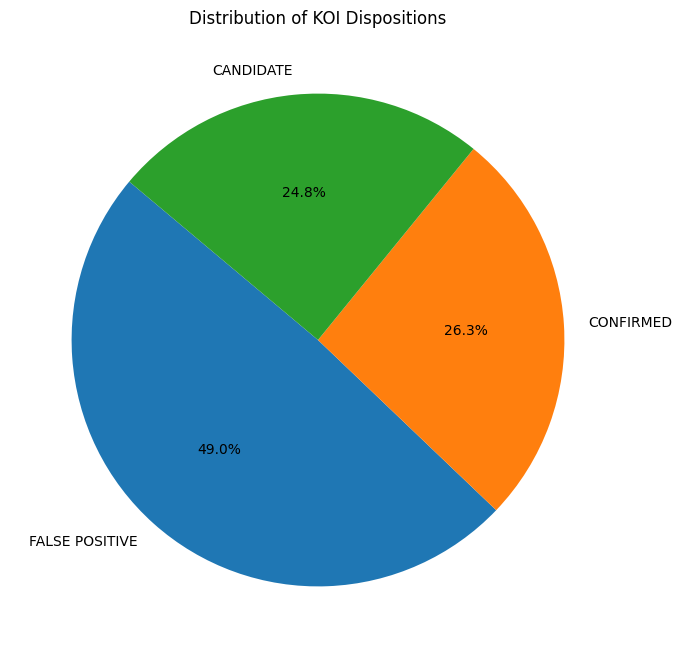

In [ ]:
disposition_counts = df['koi_disposition'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(disposition_counts, labels=disposition_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of KOI Dispositions')
plt.show()

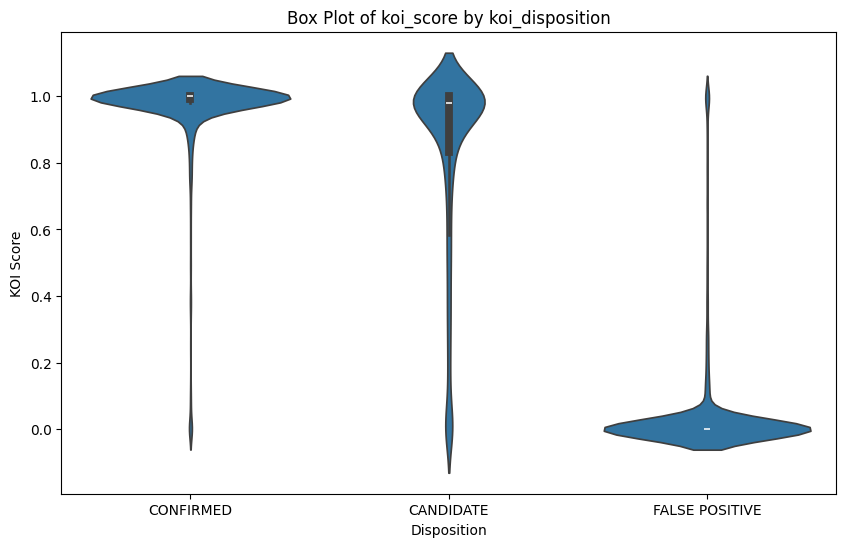

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x="koi_disposition", y="koi_score", data=df)
plt.title('Box Plot of koi_score by koi_disposition')
plt.xlabel('Disposition')
plt.ylabel('KOI Score')
plt.show()

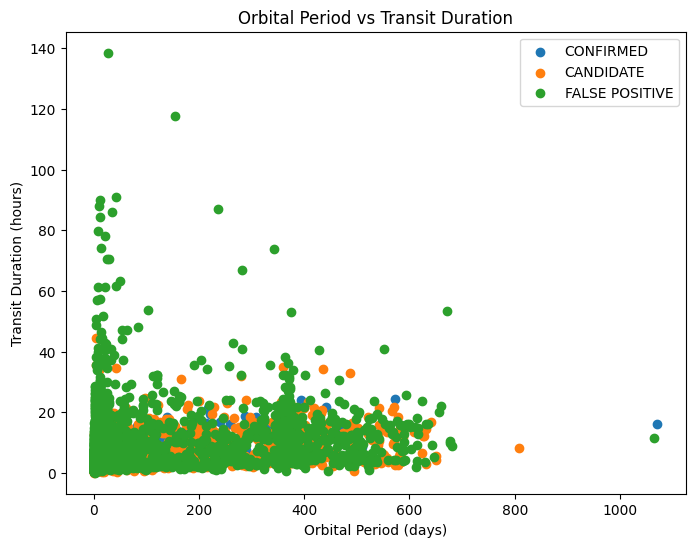

In [ ]:
plt.figure(figsize=(8, 6))
for disposition in df['koi_disposition'].unique():
    subset = df[df['koi_disposition'] == disposition]
    plt.scatter(subset['koi_period'], subset['koi_duration'], label=disposition)
plt.title('Orbital Period vs Transit Duration')
plt.xlabel('Orbital Period (days)')
plt.ylabel('Transit Duration (hours)')
plt.legend()
plt.show()

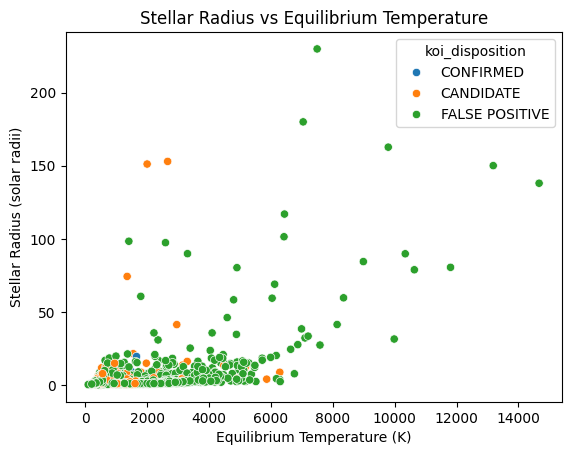

In [ ]:
## Stellar Radius vs Equilirium temp
sns.scatterplot(y="koi_srad", x = "koi_teq", data = df,hue = "koi_disposition")
plt.title('Stellar Radius vs Equilibrium Temperature')
plt.xlabel('Equilibrium Temperature (K)')
plt.ylabel('Stellar Radius (solar radii)')
plt.show()

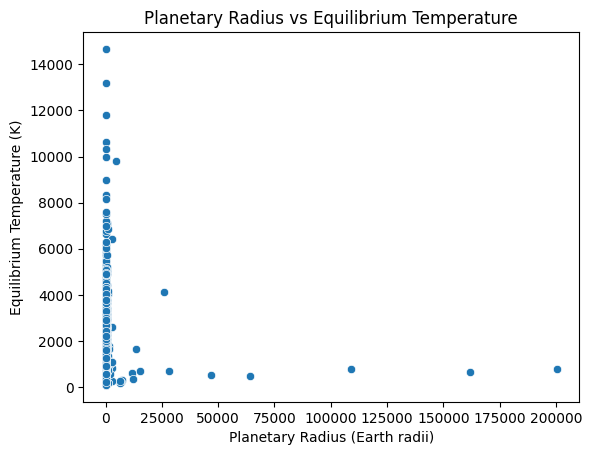

In [ ]:
## Planetary Radius vs Equilirium temp
sns.scatterplot(x="koi_prad", y = "koi_teq", data = df)
plt.title('Planetary Radius vs Equilibrium Temperature')
plt.xlabel('Planetary Radius (Earth radii)')
plt.ylabel('Equilibrium Temperature (K)')
plt.show()

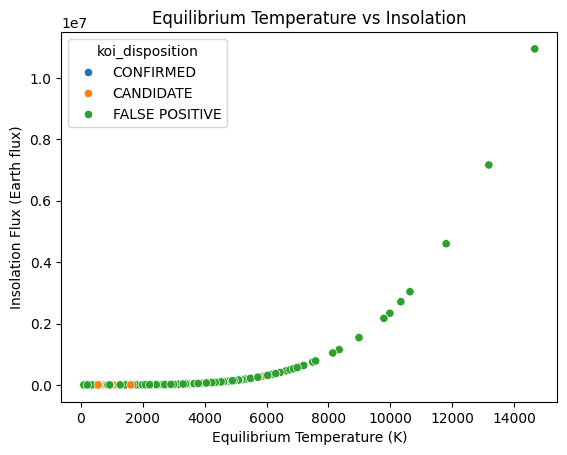

In [ ]:
sns.scatterplot(x="koi_teq", y = "koi_insol", data = df,hue="koi_disposition")
plt.title('Equilibrium Temperature vs Insolation')
plt.xlabel('Equilibrium Temperature (K)')
plt.ylabel('Insolation Flux (Earth flux)')
plt.show()

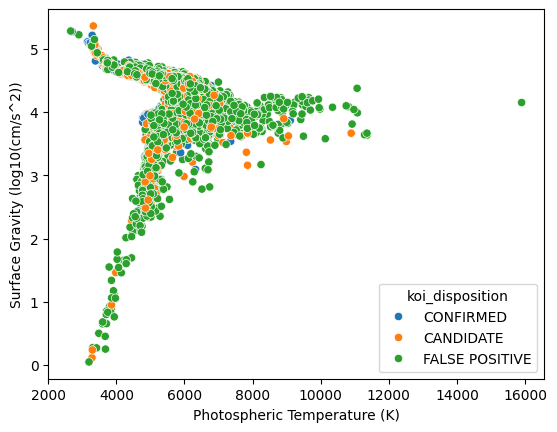

In [ ]:
## How the photospheric temperature of the star affects the acc due to gravity
sns.scatterplot(y="koi_slogg", x = "koi_steff", data = df,hue = 'koi_disposition')
plt.xlabel('Photospheric Temperature (K)')
plt.ylabel('Surface Gravity (log10(cm/s^2))')
plt.show()

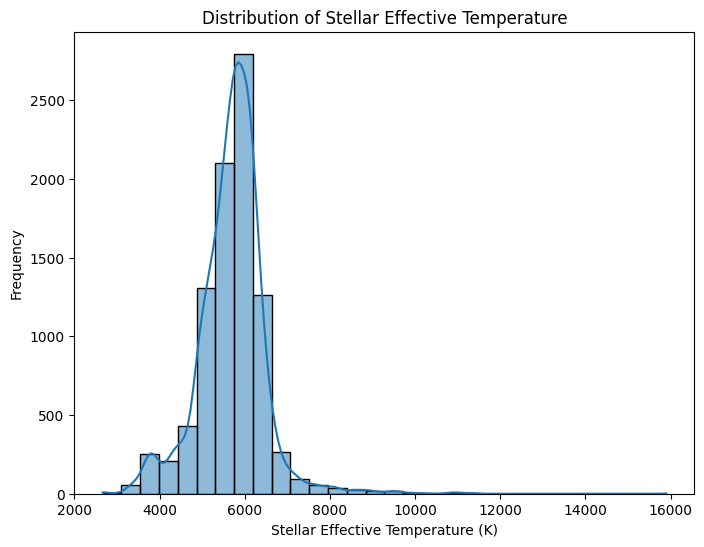

In [ ]:
# distribution of stellar effective temperature
plt.figure(figsize=(8, 6))
sns.histplot(x='koi_steff', data=df, bins=30, kde=True)
plt.title('Distribution of Stellar Effective Temperature')
plt.xlabel('Stellar Effective Temperature (K)')
plt.ylabel('Frequency')
plt.show()

<ipython-input-23-e0f5540ecc92>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


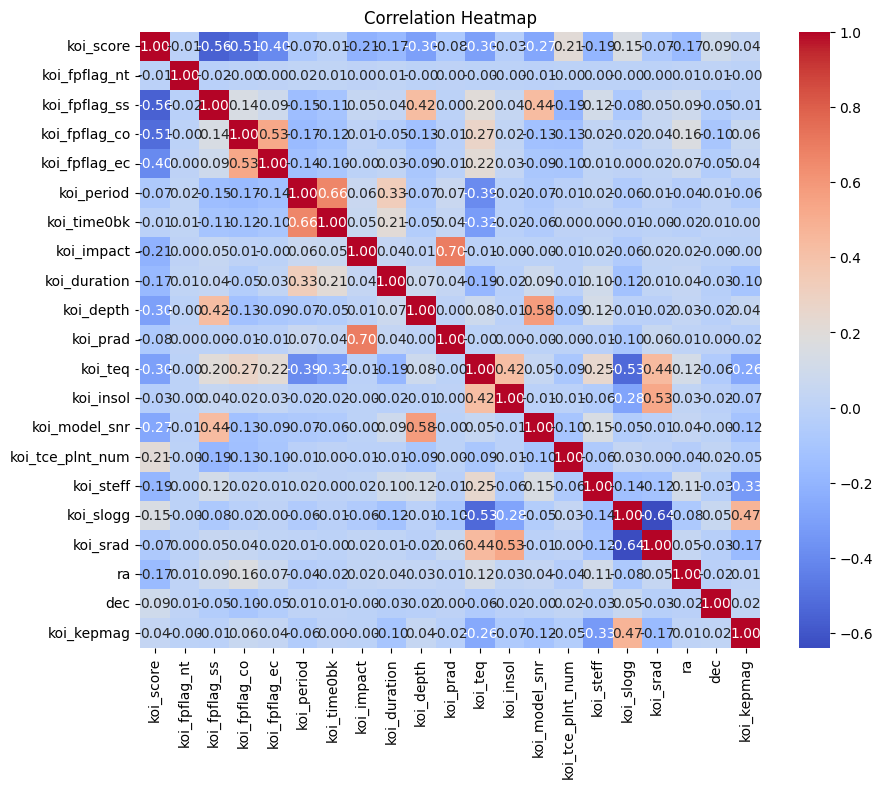

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
# filling missing values with knn

imputer = KNNImputer(n_neighbors = 3)

X_imputer = imputer.fit_transform(X)

In [ ]:
X_imputer = pd.DataFrame(X_imputer)
X_imputer.columns

RangeIndex(start=0, stop=21, step=1)

#### train test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_imputer, y,random_state=42,test_size = 0.3)

In [ ]:
X_train.shape

(6261, 21)

In [ ]:
!pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=2)

X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

#### sclaing data

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train_res)
X_test = sc.transform(X_test)

##### PCA

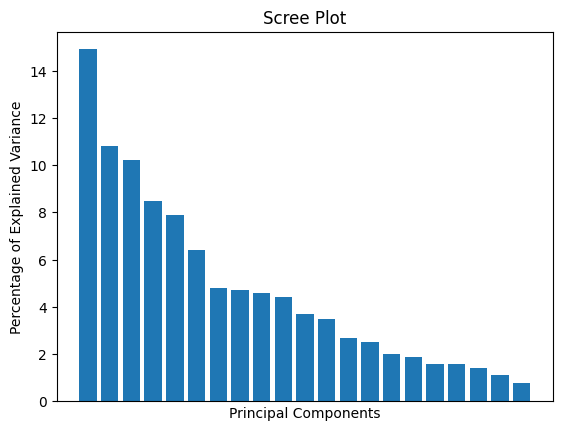

In [ ]:
pca = PCA()
X_pca = pca.fit_transform(X_train)

per_var = np.round(pca.explained_variance_ratio_*100,decimals=1)
labels = [str(x) for x in range(1,len(per_var)+1)]

plt.bar(x=range(1,len(per_var)+1),height = per_var)
plt.tick_params(
    axis = 'x',
    which = 'both',
    bottom = False,
    top = False,
    labelbottom = False)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Components')
plt.title('Scree Plot')
plt.show()

In [ ]:
X_pca_test = pca.transform(X_test)

In [ ]:
print(per_var)

[14.9 10.8 10.2  8.5  7.9  6.4  4.8  4.7  4.6  4.4  3.7  3.5  2.7  2.5
  2.   1.9  1.6  1.6  1.4  1.1  0.8]


##### LDA

In [ ]:
lda = LDA()
X_lda_train = lda.fit_transform(X_train, y_train_res)
X_lda_test = lda.transform(X_test)

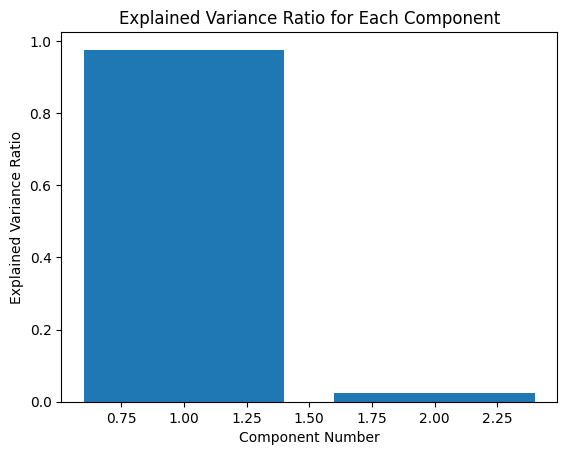

In [ ]:
explained_variance_ratio = lda.explained_variance_ratio_

# Visualize the explained variance ratio
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
plt.xlabel('Component Number')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for Each Component')
plt.show()

#### QDA

In [ ]:
# Create a QDA classifier
from sklearn.metrics import accuracy_score
qda = QDA()

# Train the classifier
qda.fit(X_train, y_train_res)

# Make predictions
y_pred = qda.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', accuracy)


Accuracy:  0.6911326378539493


/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


# ML Algos

In [ ]:
!pip install tpot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 9.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11937 sha256=710d437144e2d3730629832913a1d1063838baf2c96c9e5ca94f7d109d77c336
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit


In [ ]:
from tpot import TPOTClassifier
from sklearn.metrics import accuracy_score

tpot = TPOTClassifier(generations = 5, population_size = 20, random_state = 42, verbosity = 2)
tpot.fit(X_train,y_train_res)

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9398245074774426

Generation 2 - Current best internal CV score: 0.9398245074774426

Generation 3 - Current best internal CV score: 0.9398245074774426

Generation 4 - Current best internal CV score: 0.9398245074774426

Generation 5 - Current best internal CV score: 0.9408952859825046

Best pipeline: GradientBoostingClassifier(MLPClassifier(input_matrix, alpha=0.0001, learning_rate_init=0.1), learning_rate=1.0, max_depth=8, max_features=0.1, min_samples_leaf=17, min_samples_split=10, n_estimators=100, subsample=1.0)


TPOTClassifier(generations=5, population_size=20, random_state=42, verbosity=2)

In [ ]:
y_pred = tpot.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)

print(f"Accuracy: {accuracy}")

Accuracy: 0.9038748137108793


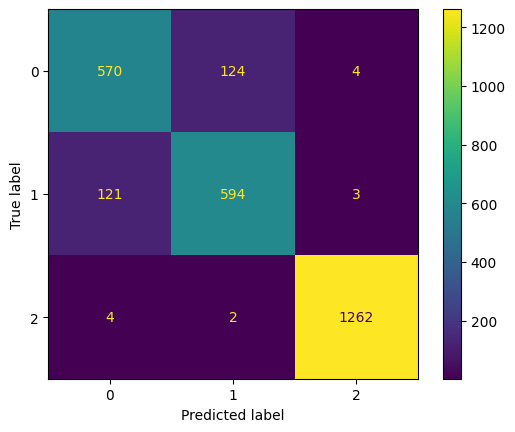

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=tpot.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix = cm,
                       display_labels = tpot.classes_)

disp.plot()
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, tpot.predict_proba(X_test),multi_class = 'ovo')
print(f'ROC-AUC Score (One V/s One): {roc_auc:.4f}')

roc_auc = roc_auc_score(y_test, tpot.predict_proba(X_test),multi_class = 'ovr')
print(f'ROC-AUC Score (One V/s All): {roc_auc:.4f}')

ROC-AUC Score (One V/s One): 0.9632
ROC-AUC Score (One V/s All): 0.9731


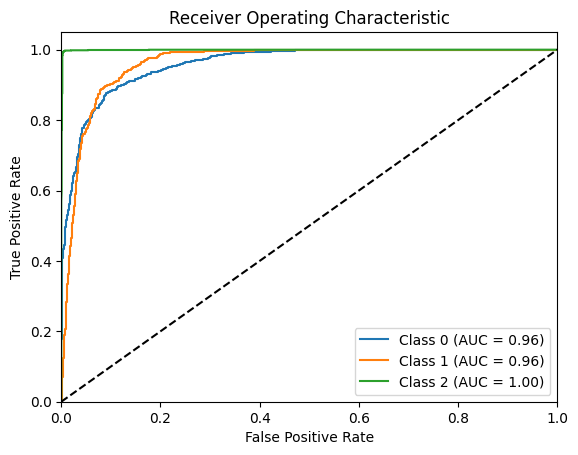

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score,auc
import matplotlib.pyplot as plt

# Assume y_test and tpot.predict_proba(X_test) are your data
y_pred_proba = tpot.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(np.unique(y_test))):
   fpr[i], tpr[i], _ = roc_curve(y_test==i, y_pred_proba[:, i])
   roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
for i in range(len(np.unique(y_test))):
   plt.plot(fpr[i], tpr[i], label='Class %d (AUC = %0.2f)' % (i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
best_pipeline = tpot.fitted_pipeline_
best_model = best_pipeline.steps[-1][1]

# Print the best model
print("Best Model:")
print(best_model)

Best Model:
GradientBoostingClassifier(learning_rate=1.0, max_depth=8, max_features=0.1,
                           min_samples_leaf=17, min_samples_split=10,
                           random_state=42)


In [ ]:
best_params = best_pipeline.get_params()

# Print all hyperparameters and their values
for param, value in best_params.items():
    print(f"{param}: {value}")

memory: None
steps: [('stackingestimator', StackingEstimator(estimator=MLPClassifier(learning_rate_init=0.1,
                                          random_state=42))), ('gradientboostingclassifier', GradientBoostingClassifier(learning_rate=1.0, max_depth=8, max_features=0.1,
                           min_samples_leaf=17, min_samples_split=10,
                           random_state=42))]
verbose: False
stackingestimator: StackingEstimator(estimator=MLPClassifier(learning_rate_init=0.1,
                                          random_state=42))
gradientboostingclassifier: GradientBoostingClassifier(learning_rate=1.0, max_depth=8, max_features=0.1,
                           min_samples_leaf=17, min_samples_split=10,
                           random_state=42)
stackingestimator__estimator__activation: relu
stackingestimator__estimator__alpha: 0.0001
stackingestimator__estimator__batch_size: auto
stackingestimator__estimator__beta_1: 0.9
stackingestimator__estimator__beta_2: 0.999
st

### Checking best parametrs for svc

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = [{'C':[0.5,1],
               'gamma' : ['scale',1,0.1,0.01,0.001],
               'kernel' : ['rbf']
              }]
optimal_params = GridSearchCV(
    SVC(),
    param_grid,
    cv = 5,
    scoring = 'accuracy',
    verbose=0
)
optimal_params.fit(X_train, y_train_res)
print(optimal_params.best_params_)

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}


# training the dataset with voting classifier


In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

# Define the Logistic Regression model
lr = LogisticRegression()

# Define the GBoost model with specified parameters
gb_classifier = GradientBoostingClassifier(learning_rate=1.0, max_depth=8, max_features=0.05,
                           min_samples_leaf=17, min_samples_split=10,
                           random_state=42)

# Define the SVC model
svc = SVC(random_state =42, gamma = 1,C = 1,probability=True)

# Create the Voting Classifier
voting_clf = VotingClassifier(
    estimators=[('lr', lr), ('gb', gb_classifier), ('svc', svc)],
    voting='soft',weights = [1,1,1])  # Specify soft voting


In [ ]:
x_pca_train=X_pca[:,:2]

In [ ]:
x_pca_train

array([[ 1.66850361,  0.34460502],
       [ 4.89506956,  0.05782461],
       [-0.98977803,  1.06792808],
       ...,
       [-0.43249327,  0.94821269],
       [-1.06914045,  0.41250447],
       [-2.11319195,  1.19080333]])

In [ ]:
from sklearn.metrics import accuracy_score
voting_clf.fit(x_pca_train, y_train_res)

y_pred = voting_clf.predict(X_pca_test[:,:2])
accuracy = accuracy_score(y_test,y_pred)

print(f"Accuracy: {accuracy}")

Accuracy: 0.6982116244411326


In [ ]:
from sklearn.metrics import accuracy_score
voting_clf.fit(X_train, y_train_res)

y_pred = voting_clf.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)

print(f"Accuracy: {accuracy}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8912071535022354


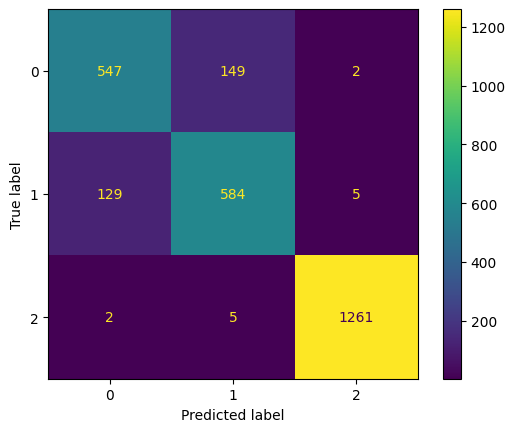

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=voting_clf.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix = cm,
                       display_labels = voting_clf.classes_)

disp.plot()
plt.show()

In [ ]:
roc_auc = roc_auc_score(y_test, voting_clf.predict_proba(X_test),multi_class = 'ovo')
print(f'ROC-AUC Score (One V/s One): {roc_auc:.4f}')

roc_auc = roc_auc_score(y_test, voting_clf.predict_proba(X_test),multi_class = 'ovr')
print(f'ROC-AUC Score (One V/s All): {roc_auc:.4f}')

ROC-AUC Score (One V/s One): 0.9548
ROC-AUC Score (One V/s All): 0.9667


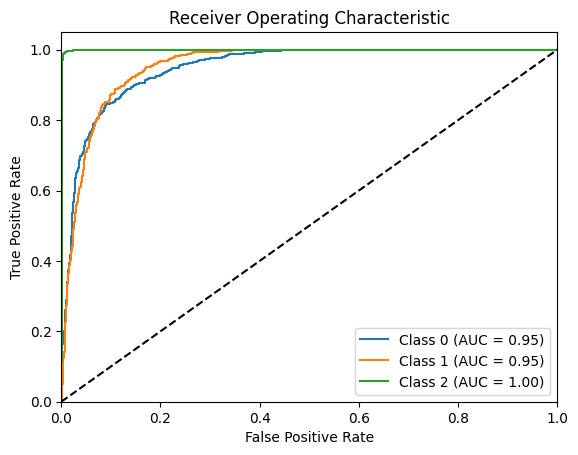

In [ ]:
# Assume y_test and tpot.predict_proba(X_test) are your data
y_pred_proba = voting_clf.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(np.unique(y_test))):
   fpr[i], tpr[i], _ = roc_curve(y_test==i, y_pred_proba[:, i])
   roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
for i in range(len(np.unique(y_test))):
   plt.plot(fpr[i], tpr[i], label='Class %d (AUC = %0.2f)' % (i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
random_forest = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto'],
    'bootstrap': [True]
}

grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train_res)
print("Best Parameters:", grid_search.best_params_)

best_random_forest = grid_search.best_estimator_

y_pred = best_random_forest.predict(X_test)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best Parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Test Accuracy: 90.42%


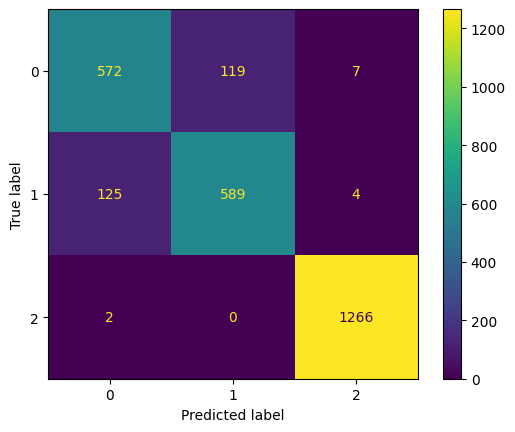

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=voting_clf.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix = cm,
                       display_labels = voting_clf.classes_)

disp.plot()
plt.show()

In [ ]:
roc_auc = roc_auc_score(y_test, best_random_forest.predict_proba(X_test),multi_class = 'ovo')
print(f'ROC-AUC Score (One V/s One): {roc_auc:.4f}')

roc_auc = roc_auc_score(y_test, best_random_forest.predict_proba(X_test),multi_class = 'ovr')
print(f'ROC-AUC Score (One V/s All): {roc_auc:.4f}')

ROC-AUC Score (One V/s One): 0.9642
ROC-AUC Score (One V/s All): 0.9735


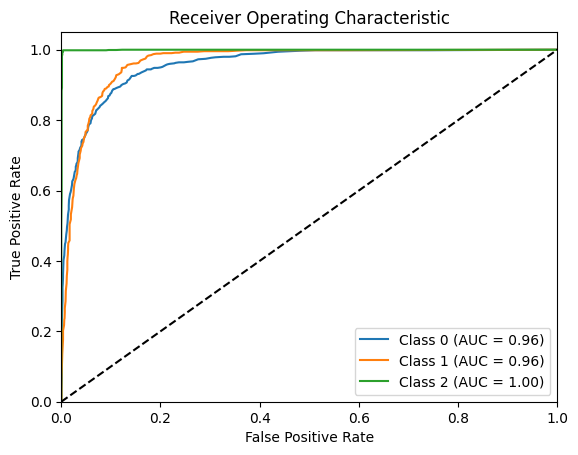

In [ ]:
# Assume y_test and tpot.predict_proba(X_test) are your data
y_pred_proba = best_random_forest.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(np.unique(y_test))):
   fpr[i], tpr[i], _ = roc_curve(y_test==i, y_pred_proba[:, i])
   roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
for i in range(len(np.unique(y_test))):
   plt.plot(fpr[i], tpr[i], label='Class %d (AUC = %0.2f)' % (i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()